### This is for analysis and convergence of the inversion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
def analyse (calculated_data, validation_data):
    error = calculated_data.ravel() - validation_data.ravel()
    md = np.mean(error)
    rmse = np.sqrt( np.mean( (error)**2 ))

    residuals = error**2
    denom = (calculated_data.ravel() - np.mean(calculated_data.ravel())) ** 2
    r2 = 1 - (np.sum(residuals) / np.sum(denom))
    # Calculate slope and y-intercept
    slope, intercept = np.polyfit(validation_data.ravel(), calculated_data.ravel(), 1)

    return md, rmse, r2, slope, intercept

def pearson(inverse, validation):
    # pearson coefficient
    ydata = inverse.ravel()
    yfit = validation.ravel()

    ydata_mean = np.mean(ydata)
    yfit_mean = np.mean(yfit)

    data_diff = ydata - ydata_mean
    fit_diff = yfit - yfit_mean

    top = np.sum( (data_diff) * (fit_diff) )

    bottom = np.sqrt( np.sum(data_diff**2) * np.sum(fit_diff**2) )

    r = top/bottom

    return r

In [3]:
# Load data
voronoi = [np.loadtxt("imagesvoronoi/snow"), np.loadtxt("imagesvoronoi/ice")]
delaunay = [np.loadtxt("images/snow"), np.loadtxt("images/ice")]
delaunay_c = [np.loadtxt("imagesclougner/snow"), np.loadtxt("imagesclougner/ice")]
true = [np.loadtxt("synthetic/syntheticobs_true.img.A"), np.loadtxt("synthetic/syntheticobs_true.img.B")]

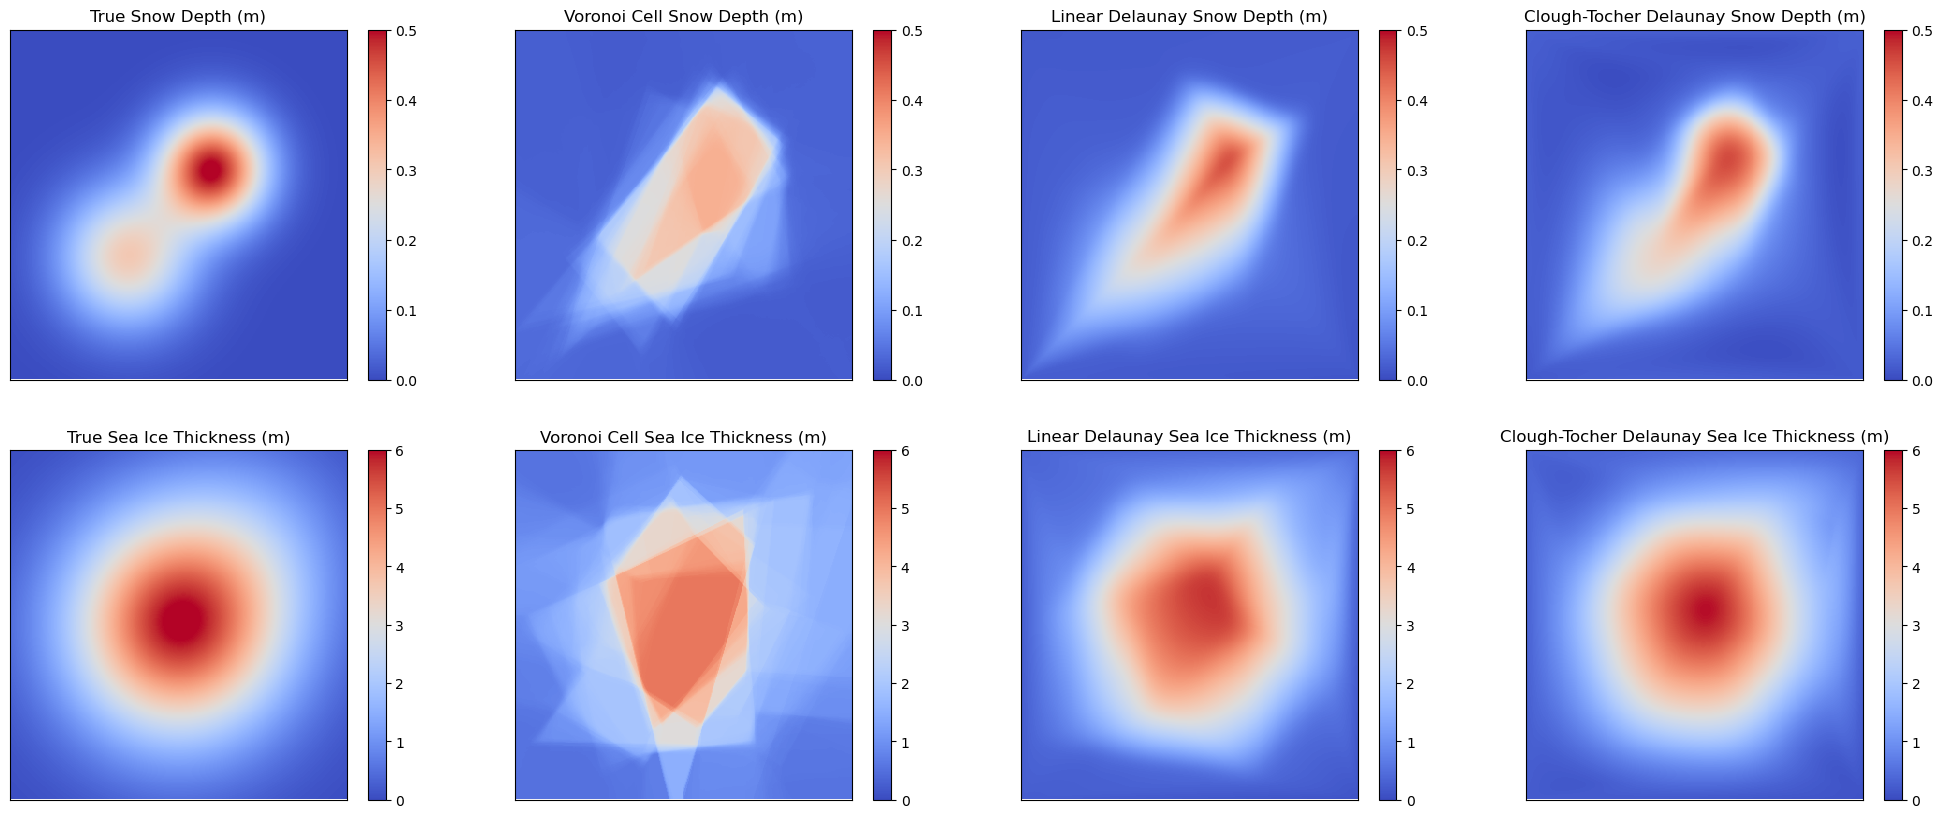

In [4]:
fig, ax = plt.subplots(2, 4, figsize=(25, 10))

# Top row
img = ax[0, 0].imshow(true[0], cmap='coolwarm', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.5)
ax[0, 0].set_title('True Snow Depth (m)')
fig.colorbar(img, ax=ax[0, 0])
ax[0, 0].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

img = ax[0, 1].imshow(voronoi[0], cmap='coolwarm', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.5)
ax[0, 1].set_title('Voronoi Cell Snow Depth (m)')
fig.colorbar(img, ax=ax[0, 1])
ax[0, 1].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

img = ax[0, 2].imshow(delaunay[0], cmap='coolwarm', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.5)
ax[0, 2].set_title('Linear Delaunay Snow Depth (m)')
fig.colorbar(img, ax=ax[0, 2])
ax[0, 2].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

img = ax[0, 3].imshow(delaunay_c[0], cmap='coolwarm', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.5)
ax[0, 3].set_title('Clough-Tocher Delaunay Snow Depth (m)')
fig.colorbar(img, ax=ax[0, 3])
ax[0, 3].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Bottom row
img = ax[1, 0].imshow(true[1], cmap='coolwarm', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 0].set_title('True Sea Ice Thickness (m)')
fig.colorbar(img, ax=ax[1, 0])
ax[1, 0].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

img = ax[1, 1].imshow(voronoi[1], cmap='coolwarm', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 1].set_title('Voronoi Cell Sea Ice Thickness (m)')
fig.colorbar(img, ax=ax[1, 1])
ax[1, 1].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

img = ax[1, 2].imshow(delaunay[1], cmap='coolwarm', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 2].set_title('Linear Delaunay Sea Ice Thickness (m)')
fig.colorbar(img, ax=ax[1, 2])
ax[1, 2].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

img = ax[1, 3].imshow(delaunay_c[1], cmap='coolwarm', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 3].set_title('Clough-Tocher Delaunay Sea Ice Thickness (m)')
fig.colorbar(img, ax=ax[1, 3])
ax[1, 3].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)


# Remove axis values
for a in ax.ravel():
    a.set_xticks([])
    a.set_yticks([])


### Linear Delauynay Parametrization analysis

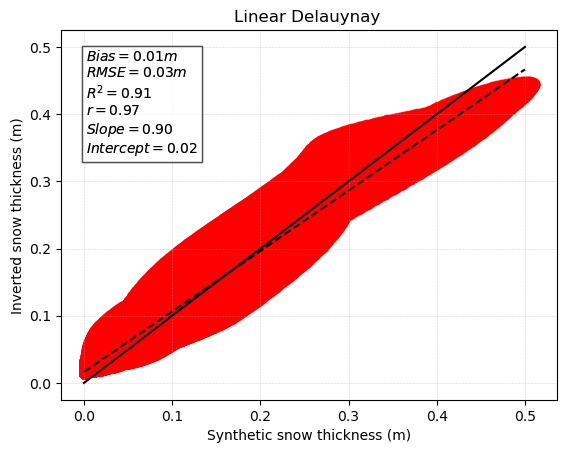

In [5]:
true_snow = np.loadtxt("synthetic/syntheticobs_true.img.A")
inverse_snow = np.loadtxt("images/snow")

md, rmse, r2, slope, intercept = analyse(inverse_snow, true_snow)
r = pearson(inverse_snow, true_snow)

# y = x line
x = y = [0,0.5]
plt.plot(x, y, 'k-')
plt.scatter(true_snow.ravel(),inverse_snow.ravel(), color='red', alpha=0.5)
plt.grid(linestyle='dotted', linewidth ='0.4')
plt.xlabel('Synthetic snow thickness (m)')
plt.ylabel('Inverted snow thickness (m)')
plt.title("Linear Delauynay ")

textstr = '\n'.join((
    rf'$Bias={md:.2f}m$',
    rf'$RMSE={rmse:.2f}m$',
    rf'$R^2={r2:.2f}$',
    rf'$r = {r:.2f}$',
    rf'$Slope = {slope:.2f}$',
    rf'$Intercept = {intercept:.2f}$'))
box_props = dict(boxstyle='square', facecolor= 'white', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=box_props)

# Put the box with text in the plot
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=box_props)

# Plot linear regression line
x_values = np.array([0,0.5])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, 'k--', label='Linear Regression')

plt.show()


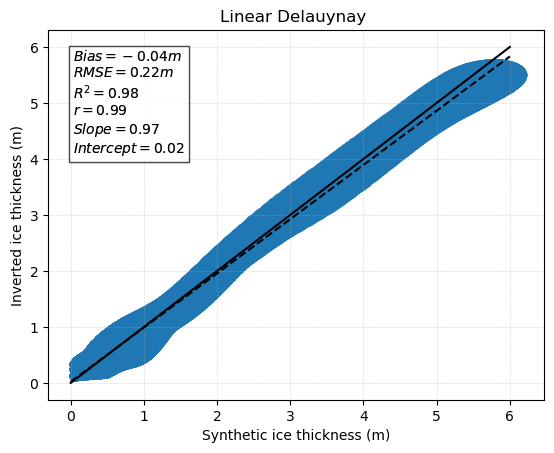

In [6]:
true_ice = np.loadtxt("synthetic/syntheticobs_true.img.B")
inverse_ice = np.loadtxt("images/ice")

md, rmse, r2, slope, intercept = analyse(inverse_ice, true_ice)
r = pearson(inverse_ice, true_ice)

# y = x line
x = y = [0,6]
plt.plot(x, y, 'k-')
plt.scatter(true_ice.ravel(),inverse_ice.ravel(), alpha=0.5)
plt.grid(linestyle='dotted', linewidth ='0.4')
plt.xlabel('Synthetic ice thickness (m)')
plt.ylabel('Inverted ice thickness (m)')
plt.title("Linear Delauynay ")

textstr = '\n'.join((
    rf'$Bias={md:.2f}m$',
    rf'$RMSE={rmse:.2f}m$',
    rf'$R^2={r2:.2f}$',
    rf'$r = {r:.2f}$',
    rf'$Slope = {slope:.2f}$',
    rf'$Intercept = {intercept:.2f}$'))
box_props = dict(boxstyle='square', facecolor= 'white', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=box_props)

# Put the box with text in the plot
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=box_props)

# Plot linear regression line
x_values = np.array([0,6])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, 'k--', label='Linear Regression')


plt.show()


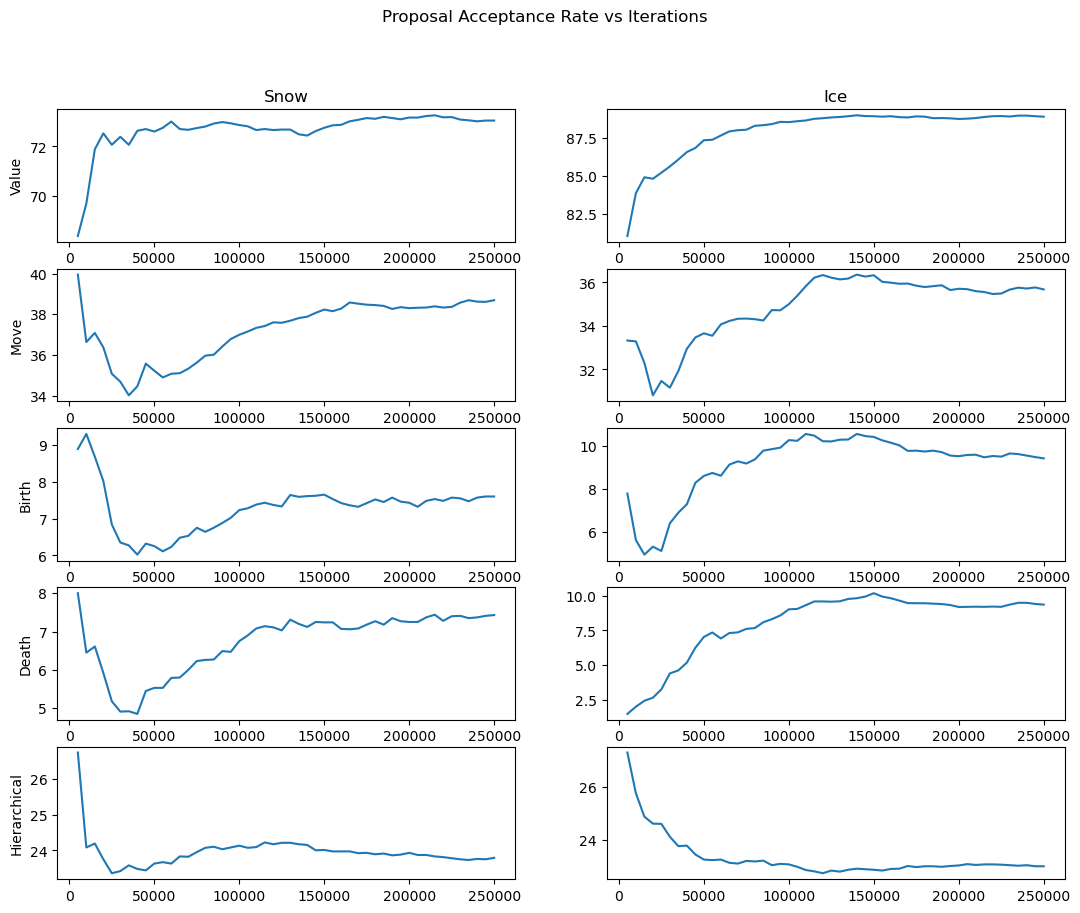

In [7]:
file = 'results/log.txt-000'

iterations = np.arange(5000,250001,5000)

keywords = ["Value", "Move", "Birth", "Death", "Hierarchical"]

rate = {key: {"snow": [], "ice": []} for key in keywords}

with open(file) as f:
    for line in f:
        data = line.split()

        for key in keywords:
            if key in line:
                rate[key]["snow"].append(float(data[4]))
                rate[key]["ice"].append(float(data[9]))
            

plt.figure(figsize=(13,10))
plt.suptitle('Proposal Acceptance Rate vs Iterations')

plt.subplot(5,2,1)
plt.plot(iterations, rate["Value"]["snow"], '-')
plt.ylabel("Value")
plt.title('Snow')

plt.subplot(5,2,2)
plt.plot(iterations, rate["Value"]["ice"],'-')
plt.title('Ice')

plt.subplot(5,2,3)
plt.plot(iterations, rate["Move"]['snow'],'-')
plt.ylabel("Move")

plt.subplot(5,2,4)
plt.plot(iterations, rate["Move"]['ice'],'-')

plt.subplot(5,2,5)
plt.plot(iterations, rate["Birth"]['snow'],'-')
plt.ylabel("Birth")
plt.subplot(5,2,6)
plt.plot(iterations, rate["Birth"]['ice'],'-')

plt.subplot(5,2,7)
plt.plot(iterations, rate["Death"]['snow'],'-')
plt.ylabel("Death")
plt.subplot(5,2,8)
plt.plot(iterations, rate["Death"]['ice'],'-')

plt.subplot(5,2,9)
plt.plot(iterations, rate["Hierarchical"]['snow'],'-')
plt.ylabel("Hierarchical")
plt.subplot(5,2,10)
plt.plot(iterations, rate["Hierarchical"]['ice'],'-')

plt.show()

### Clough-Tocher Delaunay parametrization

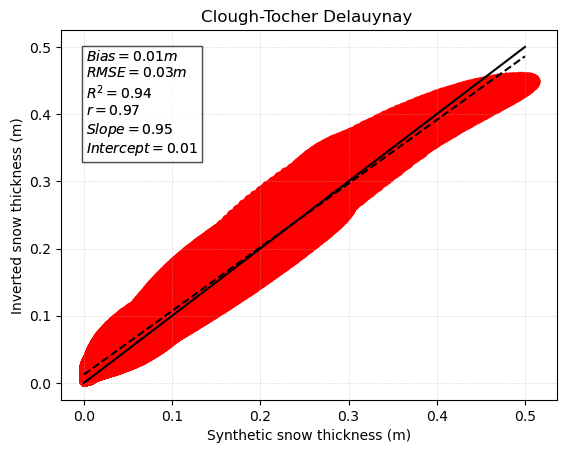

In [8]:
true_snow = np.loadtxt("synthetic/syntheticobs_true.img.A")
inverse_snow = np.loadtxt("imagesclougner/snow")

md, rmse, r2, slope, intercept = analyse(inverse_snow, true_snow)
r = pearson(inverse_snow, true_snow)

# y = x line
x = y = [0,0.5]
plt.plot(x, y, 'k-')
plt.scatter(true_snow.ravel(),inverse_snow.ravel(), color='red', alpha=0.5)
plt.grid(linestyle='dotted', linewidth ='0.4')
plt.xlabel('Synthetic snow thickness (m)')
plt.ylabel('Inverted snow thickness (m)')
plt.title("Clough-Tocher Delauynay ")

textstr = '\n'.join((
    rf'$Bias={md:.2f}m$',
    rf'$RMSE={rmse:.2f}m$',
    rf'$R^2={r2:.2f}$',
    rf'$r = {r:.2f}$',
    rf'$Slope = {slope:.2f}$',
    rf'$Intercept = {intercept:.2f}$'))
box_props = dict(boxstyle='square', facecolor= 'white', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=box_props)

# Put the box with text in the plot
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=box_props)

# Plot linear regression line
x_values = np.array([0,0.5])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, 'k--', label='Linear Regression')

plt.show()

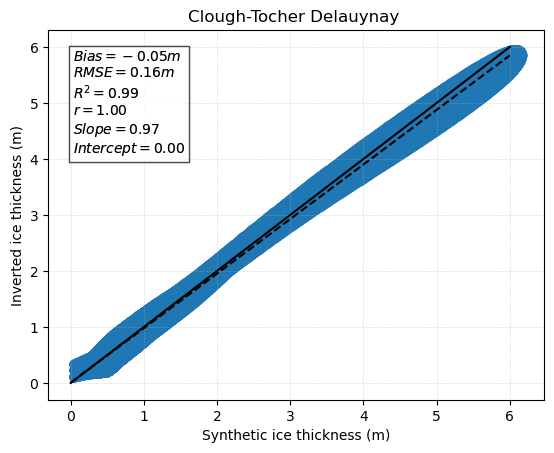

In [9]:
true_ice = np.loadtxt("synthetic/syntheticobs_true.img.B")
inverse_ice = np.loadtxt("imagesclougner/ice")

md, rmse, r2, slope, intercept = analyse(inverse_ice, true_ice)
r = pearson(inverse_ice, true_ice)

# y = x line
x = y = [0,6]
plt.plot(x, y, 'k-')
plt.scatter(true_ice.ravel(),inverse_ice.ravel(), alpha=0.5)
plt.grid(linestyle='dotted', linewidth ='0.4')
plt.xlabel('Synthetic ice thickness (m)')
plt.ylabel('Inverted ice thickness (m)')
plt.title("Clough-Tocher Delauynay ")

textstr = '\n'.join((
    rf'$Bias={md:.2f}m$',
    rf'$RMSE={rmse:.2f}m$',
    rf'$R^2={r2:.2f}$',
    rf'$r = {r:.2f}$',
    rf'$Slope = {slope:.2f}$',
    rf'$Intercept = {intercept:.2f}$'))
box_props = dict(boxstyle='square', facecolor= 'white', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=box_props)

# Put the box with text in the plot
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=box_props)

# Plot linear regression line
x_values = np.array([0,6])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, 'k--', label='Linear Regression')


plt.show()


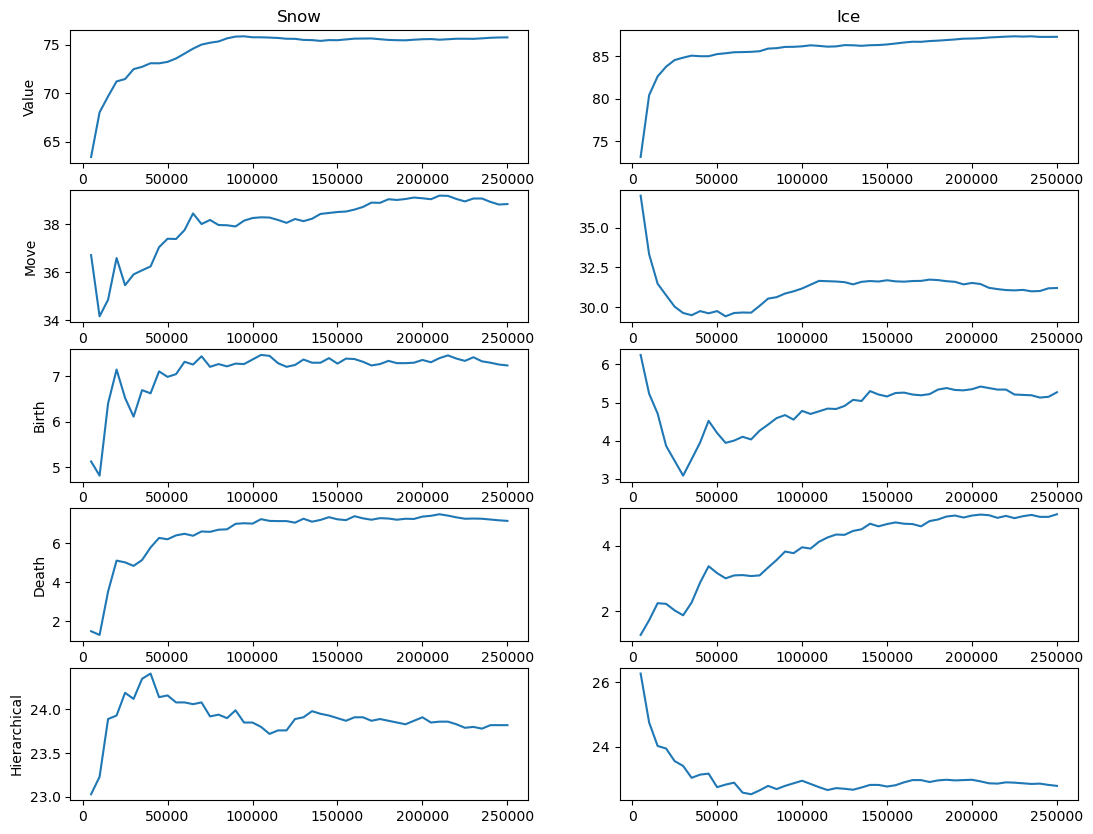

In [10]:
file = 'resultsclough/log.txt-000'

iterations = np.arange(5000,250001,5000)

keywords = ["Value", "Move", "Birth", "Death", "Hierarchical"]

rate = {key: {"snow": [], "ice": []} for key in keywords}

with open(file) as f:
    for line in f:
        data = line.split()

        for key in keywords:
            if key in line:
                rate[key]["snow"].append(float(data[4]))
                rate[key]["ice"].append(float(data[9]))
            

plt.figure(figsize=(13,10))

plt.subplot(5,2,1)
plt.plot(iterations, rate["Value"]["snow"], '-')
plt.ylabel("Value")
plt.title('Snow')

plt.subplot(5,2,2)
plt.plot(iterations, rate["Value"]["ice"],'-')
plt.title('Ice')

plt.subplot(5,2,3)
plt.plot(iterations, rate["Move"]['snow'],'-')
plt.ylabel("Move")

plt.subplot(5,2,4)
plt.plot(iterations, rate["Move"]['ice'],'-')

plt.subplot(5,2,5)
plt.plot(iterations, rate["Birth"]['snow'],'-')
plt.ylabel("Birth")
plt.subplot(5,2,6)
plt.plot(iterations, rate["Birth"]['ice'],'-')

plt.subplot(5,2,7)
plt.plot(iterations, rate["Death"]['snow'],'-')
plt.ylabel("Death")
plt.subplot(5,2,8)
plt.plot(iterations, rate["Death"]['ice'],'-')

plt.subplot(5,2,9)
plt.plot(iterations, rate["Hierarchical"]['snow'],'-')
plt.ylabel("Hierarchical")
plt.subplot(5,2,10)
plt.plot(iterations, rate["Hierarchical"]['ice'],'-')

plt.show()

### Voronoi Parametrization analysis

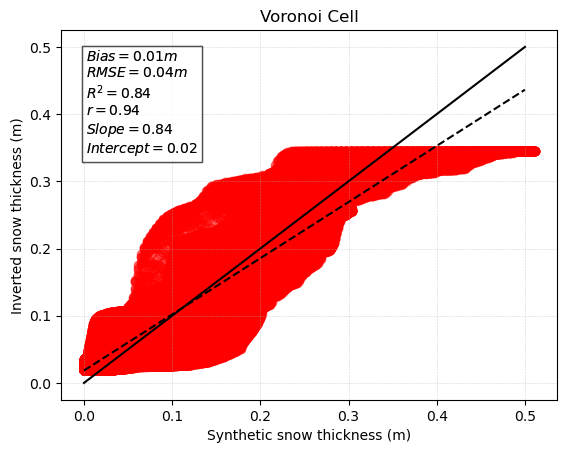

In [11]:
true_snow = np.loadtxt("synthetic/syntheticobs_true.img.A")
inverse_snow = np.loadtxt("imagesvoronoi/snow")

md, rmse, r2, slope, intercept = analyse(inverse_snow, true_snow)
r = pearson(inverse_snow, true_snow)

# y = x line
x = y = [0,0.5]
plt.plot(x, y, 'k-')
plt.scatter(true_snow.ravel(),inverse_snow.ravel(), color='red', alpha=0.5)
plt.grid(linestyle='dotted', linewidth ='0.4')
plt.xlabel('Synthetic snow thickness (m)')
plt.ylabel('Inverted snow thickness (m)')
plt.title("Voronoi Cell")

textstr = '\n'.join((
    rf'$Bias={md:.2f}m$',
    rf'$RMSE={rmse:.2f}m$',
    rf'$R^2={r2:.2f}$',
    rf'$r = {r:.2f}$',
    rf'$Slope = {slope:.2f}$',
    rf'$Intercept = {intercept:.2f}$'))
box_props = dict(boxstyle='square', facecolor= 'white', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=box_props)

# Put the box with text in the plot
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=box_props)

# Plot linear regression line
x_values = np.array([0,0.5])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, 'k--', label='Linear Regression')

plt.show()


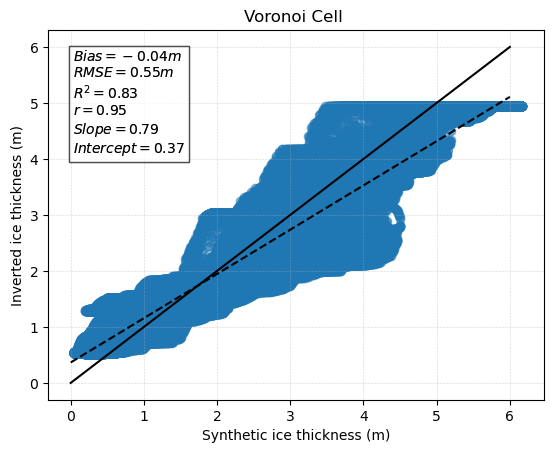

In [12]:
tue_ice = np.loadtxt("synthetic/syntheticobs_true.img.B")
inverse_ice = np.loadtxt("imagesvoronoi/ice")

md, rmse, r2, slope, intercept = analyse(inverse_ice, true_ice)
r = pearson(inverse_ice, true_ice)

# y = x line
x = y = [0,6]
plt.plot(x, y, 'k-')
plt.scatter(true_ice.ravel(),inverse_ice.ravel(), alpha=0.5)
plt.grid(linestyle='dotted', linewidth ='0.4')
plt.xlabel('Synthetic ice thickness (m)')
plt.ylabel('Inverted ice thickness (m)')
plt.title("Voronoi Cell ")

textstr = '\n'.join((
    rf'$Bias={md:.2f}m$',
    rf'$RMSE={rmse:.2f}m$',
    rf'$R^2={r2:.2f}$',
    rf'$r = {r:.2f}$',
    rf'$Slope = {slope:.2f}$',
    rf'$Intercept = {intercept:.2f}$'))
box_props = dict(boxstyle='square', facecolor= 'white', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=box_props)

# Put the box with text in the plot
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=box_props)

# Plot linear regression line
x_values = np.array([0,6])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, 'k--', label='Linear Regression')


plt.show()


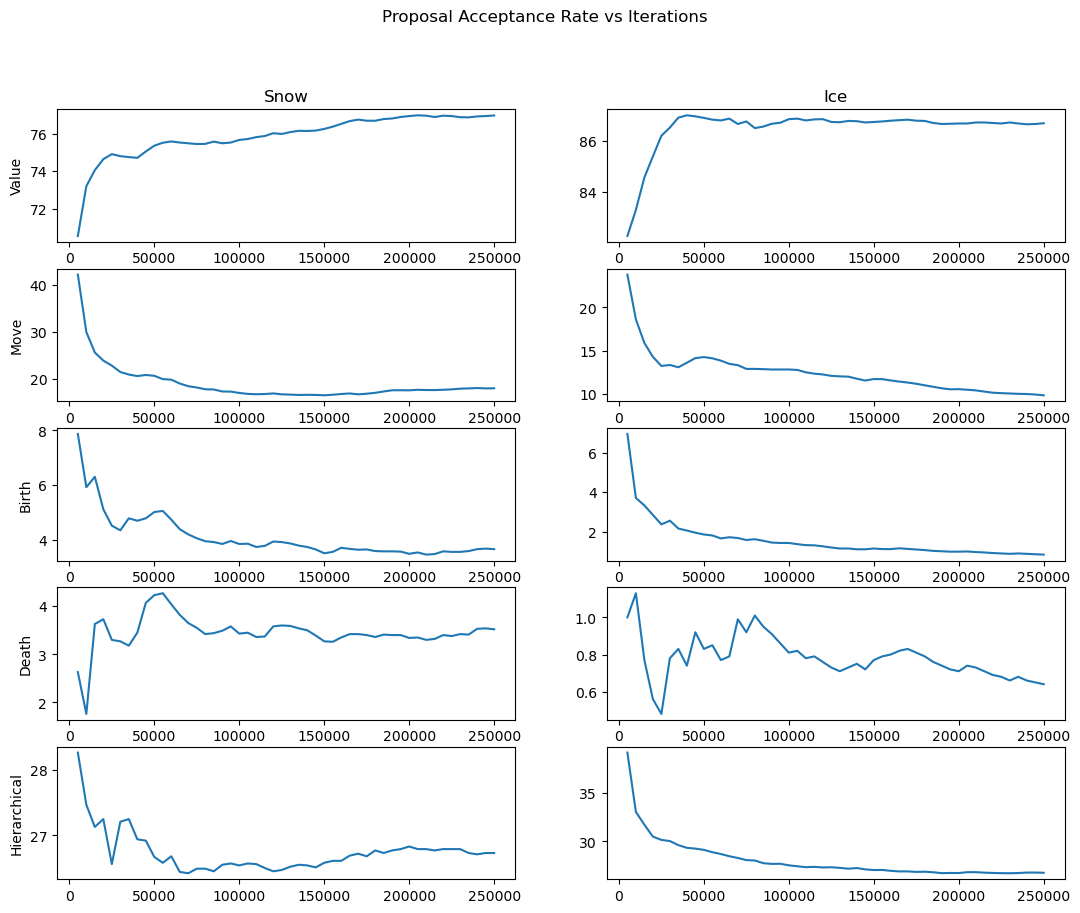

In [13]:
file = 'resultsvoronoi/log.txt-000'

iterations = np.arange(5000,250001,5000)

keywords = ["Value", "Move", "Birth", "Death", "Hierarchical"]

rate = {key: {"snow": [], "ice": []} for key in keywords}

with open(file) as f:
    for line in f:
        data = line.split()

        for key in keywords:
            if key in line:
                rate[key]["snow"].append(float(data[4]))
                rate[key]["ice"].append(float(data[9]))
            

plt.figure(figsize=(13,10))
plt.suptitle('Proposal Acceptance Rate vs Iterations')

plt.subplot(5,2,1)
plt.plot(iterations, rate["Value"]["snow"], '-')
plt.ylabel("Value")
plt.title('Snow')

plt.subplot(5,2,2)
plt.plot(iterations, rate["Value"]["ice"],'-')
plt.title('Ice')

plt.subplot(5,2,3)
plt.plot(iterations, rate["Move"]['snow'],'-')
plt.ylabel("Move")

plt.subplot(5,2,4)
plt.plot(iterations, rate["Move"]['ice'],'-')

plt.subplot(5,2,5)
plt.plot(iterations, rate["Birth"]['snow'],'-')
plt.ylabel("Birth")
plt.subplot(5,2,6)
plt.plot(iterations, rate["Birth"]['ice'],'-')

plt.subplot(5,2,7)
plt.plot(iterations, rate["Death"]['snow'],'-')
plt.ylabel("Death")
plt.subplot(5,2,8)
plt.plot(iterations, rate["Death"]['ice'],'-')

plt.subplot(5,2,9)
plt.plot(iterations, rate["Hierarchical"]['snow'],'-')
plt.ylabel("Hierarchical")
plt.subplot(5,2,10)
plt.plot(iterations, rate["Hierarchical"]['ice'],'-')

plt.show()